<a href="https://colab.research.google.com/github/rara-by/Practice-Notebooks/blob/main/Copy_of_S24_AISec_Spam_Text_Message_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AISec - S24: Spam Text Message Classification with Logistic Regression

Welcome to this tutorial where we will delve into the fascinating world of Artificial Intelligence and Cybersecurity by building a spam text message classifier. As digital communication becomes increasingly ubiquitous, so does the prevalence of spam messages, posing both annoyance and security risks. Our objective is to develop a machine learning model that can accurately distinguish between spam (unwanted) and ham (legitimate) text messages, enabling more secure and efficient communication channels.

### Dataset Overview
In this tutorial, we will work with the [SMS Spam Collection dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset), containing 5,574 text messages, each labeled as either 'spam' or 'ham'. This dataset offers a real-world glimpse into the challenge of text message classification, providing a balanced mix of simple, everyday conversations (ham) and unsolicited, often misleading content (spam). A notable characteristic of this dataset is its imbalance: approximately 87% of the messages are ham, while the remaining 13% are spam. This imbalance mirrors real-world conditions, where legitimate messages far outnumber spam, but it also introduces specific challenges in training a machine learning model to detect spam effectively.

### Tutorial Structure
The tutorial is structured as follows:

1. **Exploratory Data Analysis (EDA):** We'll start by exploring the dataset to understand its characteristics, including its imbalance and the nature of the text messages. This step is crucial for identifying patterns, anomalies, or any preprocessing steps needed to make the data suitable for modeling.

2. **Data Preprocessing:** Here, we'll clean and prepare the text data for modeling. This involves removing unnecessary elements such as punctuation and numbers, converting text to lowercase, and possibly identifying and handling stopwords. These steps are essential for reducing noise in the data and improving the model's ability to learn meaningful patterns.

3. **Featurization:** We will convert the preprocessed text messages into a numerical format that machine learning algorithms can work with. Specifically, we'll use SKLearn's `CountVectorizer()` to transform the text messages into a sparse matrix of token counts. This process, known as vectorization, is pivotal for text classification tasks.

4. **Model Training:** With our data prepared and featurized, we'll train a logistic regression model for binary classification. Logistic regression is a powerful and straightforward algorithm suitable for baseline models in binary classification problems, including spam detection.

5. **Model Evaluation:** Finally, we'll evaluate the performance of our classifier using appropriate metrics. Given the dataset's imbalance, we'll focus on metrics that provide a nuanced view of the model's ability to identify spam messages accurately without overly penalizing legitimate messages.

### Learning Objectives
By the end of this tutorial, you will:
- Understand the steps involved in preparing text data for classification tasks.
- Be familiar with the process of converting text data into a format suitable for machine learning models.
- Gain practical experience in training and evaluating a logistic regression model for a binary classification problem.
- Learn how to deal with challenges posed by imbalanced datasets in machine learning projects.

This tutorial is designed for students interested in AI and Cybersecurity, offering hands-on experience in tackling a common yet critical issue in digital communication. Let's dive into the world of text classification and uncover the strategies to build a robust spam message classifier!

### 0. Importing all necessary libraries

In [1]:
# For data frame operations
import pandas as pd

# Array conversion
import numpy as np

# For plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Word cloud generation
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# ML libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### I. Familiarizing with the SMS Spam Texts dataset

In [4]:
# Dataset is available here: https://github.com/UNHSAILLab/S24-AISec/blob/main/M03%20-%20Spam%20and%20Phish%20Detection/SMS-Dataset.csv
# Read the SMS Spam text dataset
# df = pd.read_csv('SMS-Dataset.csv')
df = pd.read_csv('https://raw.githubusercontent.com/UNHSAILLab/S24-AISec/main/M03%20-%20Spam%20and%20Phish%20Detection/SMS-Dataset.csv')

In [5]:
# Display first five rows
df.head()
#corpus = df["Message"]
#corpus


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Basic information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


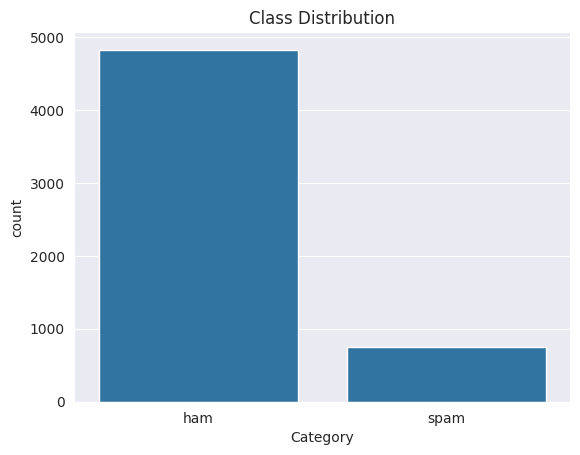

In [8]:
# Visualize the class ditribution in the dataset

sns.countplot(x='Category', data=df)
plt.title('Class Distribution')
plt.show()  # ham is the major class, Spam is minor

### II. Wordcloud Analysis

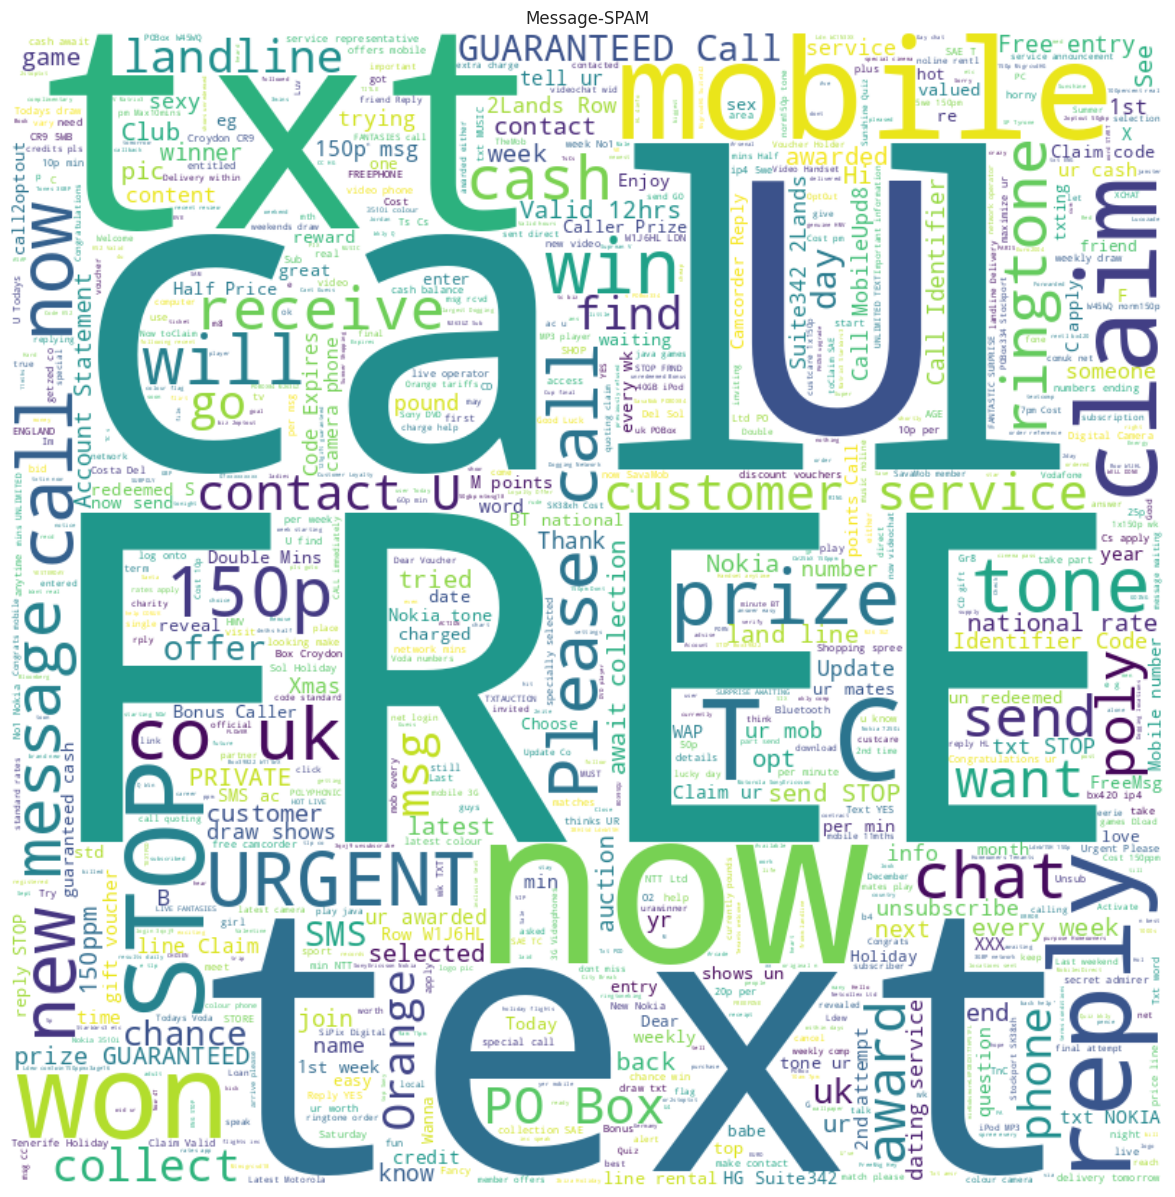

In [9]:
# Wordcloud for spam texts

spam = df[df["Category"]=='spam']
spam_words = " ".join(comment for comment in spam["Message"])
wordcloud = WordCloud(max_words=1000,background_color="white", width=800, height=800,
                 contour_width=3, contour_color='firebrick').generate(spam_words)
# Display the generated image:
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Message-SPAM")
plt.axis("off")
plt.show()

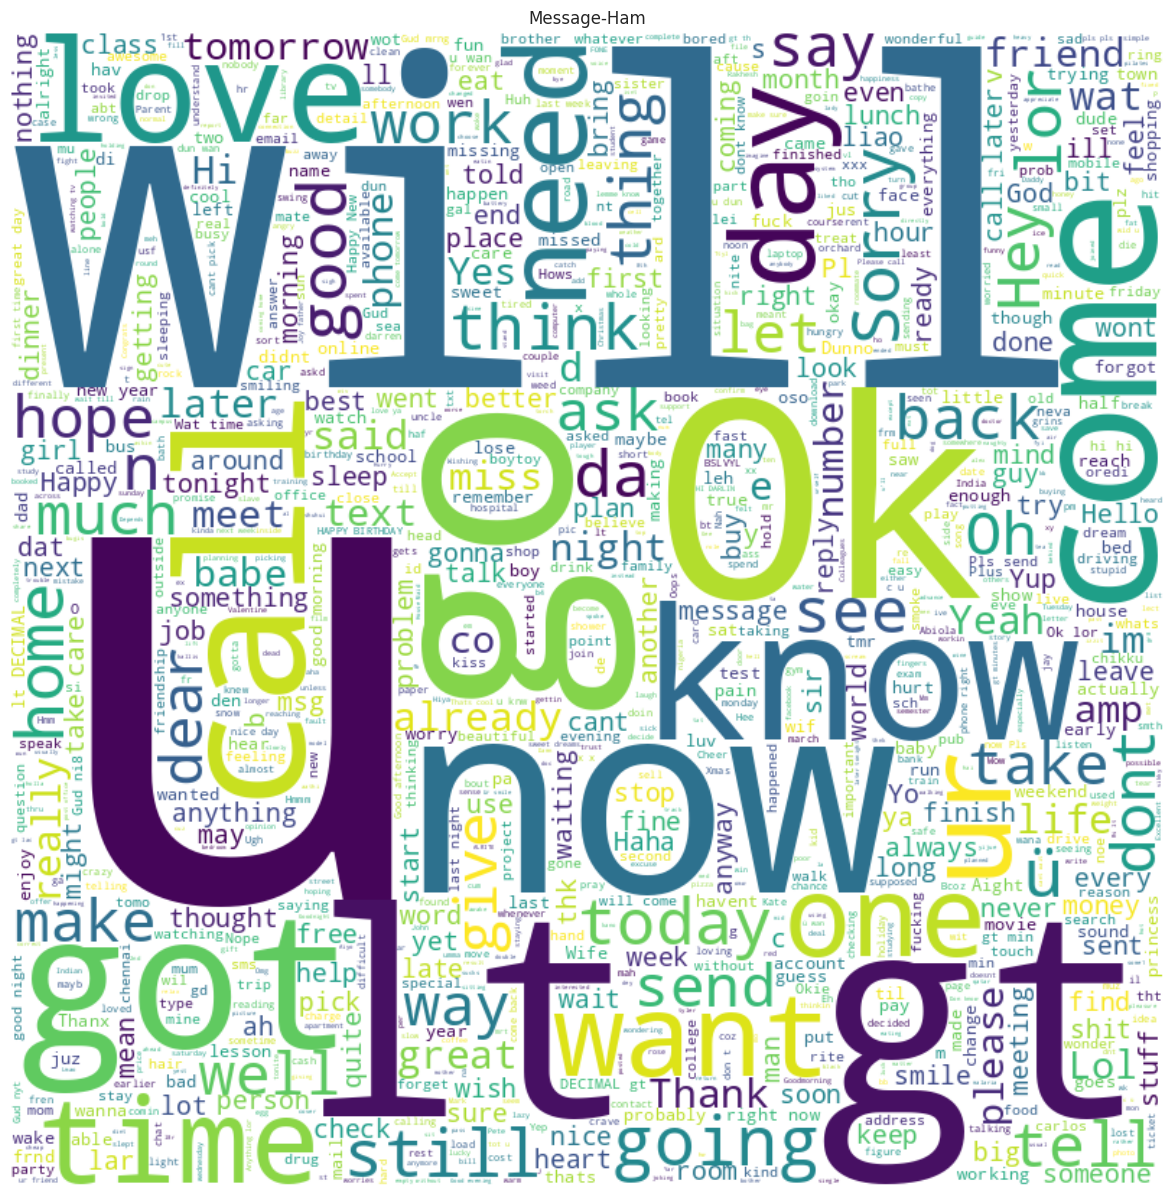

In [10]:
# Wordcloud for ham texts

ham = df[df["Category"]=='ham']

ham_words = " ".join(comment for comment in ham["Message"])
wordcloud = WordCloud(max_words=1000,background_color="white", width=800, height=800,
                     contour_width=3, contour_color='firebrick').generate(ham_words)
 # Display the generated image:
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Message-Ham")
plt.axis("off")
plt.show()

# Text Featurization Using Bag of Words and Count-Based Approach

After our exploratory data analysis (EDA), we now understand the distribution and characteristics of our dataset. The next critical step in developing our spam text message classifier is text featurization. Featurization is the process of converting text data into numerical features that machine learning models can understand and process. One of the most fundamental and widely used techniques for text featurization is the Bag of Words (BoW) model, particularly through a count-based approach.

## Understanding Bag of Words (BoW)

The Bag of Words model is a simplification of text where it is represented as a bag of its words, disregarding grammar and even word order but keeping multiplicity. This model converts text documents into vectors, where each dimension corresponds to a unique word in the corpus (the entire set of documents), and the value in each dimension represents some measure of the presence of that word in the document. In its simplest form, this measure is often the count of occurrences of each word; hence, the term "count-based approach."

## Count-Based Approach

The count-based approach quantifies the occurrence of words within documents. For each document, it creates a feature vector where each feature is the number of times a specific word appears in the document. This method is straightforward yet powerful, allowing models to learn from the frequency of words used in different contexts. However, one limitation is that common words like "the," "is," and "in," which appear frequently across texts, may overshadow the less common but more meaningful words.

### Example of Feature Vectors

Consider a very small corpus consisting of two text messages:
1. "Hello world"
2. "Hello spam world"

Applying the count-based BoW approach, we first build a vocabulary from all unique words in our corpus: ["Hello", "world", "spam"]. Next, we create a feature vector for each document:
- For the first message, "Hello world", the feature vector would be [1, 1, 0], indicating that "Hello" and "world" each appear once, while "spam" does not appear.
- For the second message, "Hello spam world", the feature vector would be [1, 1, 1], as each of the words "Hello", "world", and "spam" appears once.

This process transforms the textual data into numerical form, making it suitable for machine learning algorithms.

### Implementing Count-Based Featurization

In practice, we implement the count-based BoW model using tools such as SKLearn's `CountVectorizer`. This tool automatically converts a collection of text documents into a matrix of token counts, through tokenization, vocabulary building, and count calculation, resulting in a sparse matrix where most values are zero.

### Advantages and Limitations

The count-based BoW model is advantageous due to its simplicity and ease of implementation. It provides a good starting point for text classification tasks, such as spam detection. However, it has limitations, including a lack of context, semantics, and word order consideration, and potential dominance of common words.

Despite these limitations, the count-based BoW approach offers a solid foundation for many text classification tasks. It allows us to transform our text data into a numerical format that can be used to train our spam classifier, setting the stage for further refinement and evaluation of our model's performance.

In [11]:
# BoW - Bag of words

# create a corpus for the vectorizer
corpus = df['Message']

# initialize CV object
vectorizer = CountVectorizer()

# Create vocabulary and transform to numeric data using the fit_transform() method
bow_matrix = vectorizer.fit_transform(corpus)

In [12]:
# making the dataframe

#get the Bag of Words (BOW) matrix form
bow_df = pd.DataFrame(bow_matrix.toarray())

# Intoduce the target feature to bow_df
bow_df['label'] = df['Category'].values

### IV. Training a Logistic Regression for Binary Classification
To train a logistic regression binary classifier for your spam detection task, you will follow these general steps:

1. Split the data into training and test sets.
2. Initialize and train the logistic regression model on the training set.
3. Evaluate the model's performance on the test set.

Below is an example code block that demonstrates these steps using scikit-learn:

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the dataset into the Training set and Test set
X = bow_df.drop('label', axis=1)  # Features
y = bow_df['label']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initializing and training the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, solver='liblinear')
# liblinear updates one parameter at a time, max_iter doesn't mean anything here
logistic_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = logistic_model.predict(X_test)

# Evaluating the model using accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.9811659192825112


### Explanation of the Code:

- **Train-Test Split**: `train_test_split` is used to partition the dataset into a training set and a testing set. Here, 20% of the data is reserved for testing the model's performance. The `stratify` parameter ensures that the train and test sets have approximately the same percentage of samples of each target class as the complete set, which is crucial for imbalanced datasets.

- **Logistic Regression Model**: We initialize a `LogisticRegression` model with `max_iter=1000` to ensure convergence and `solver='liblinear'` which is a good choice for small datasets and binary classification. You can adjust these parameters based on your specific needs or if you encounter convergence issues.

- **Model Training**: The model is trained using the `.fit()` method on the training data.

- **Predictions and Evaluation**: After training, we use the `.predict()` method to make predictions on the test set. We then measure the accuracy of the model as a first step in evaluating the model. For a more thorough evaluation of your logistic regression model, you will want to look at the confusion matrix, precision, recall, and F1 score in addition to accuracy. These metrics provide a deeper insight into how well your model is performing, especially in terms of its ability to distinguish between the positive (spam) and negative (ham) classes. Below is a code block that calculates these metrics and visualizes the confusion matrix using Matplotlib and Seaborn for better interpretation:

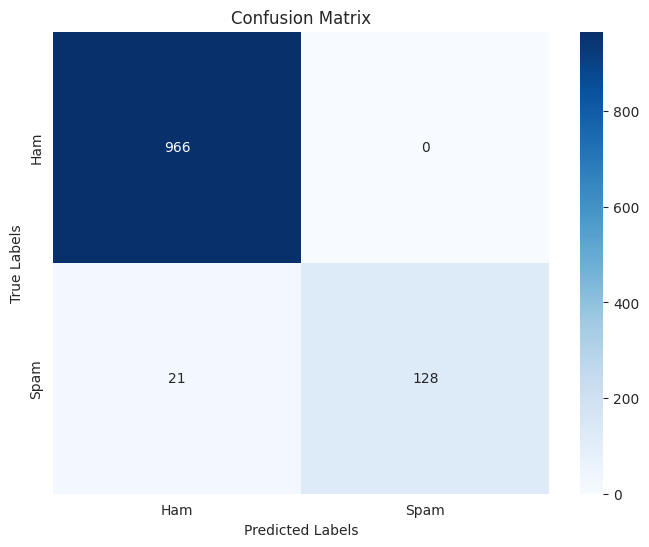

Precision: 1.0000
Recall: 0.8591
F1 Score: 0.9242


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision, recall, and F1 score, specifying 'spam' as the positive class
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label='spam')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


### Explanation of the Code:

- **Confusion Matrix Calculation and Visualization**: The confusion matrix is calculated using `confusion_matrix` from sklearn.metrics. It's visualized as a heatmap using Matplotlib and Seaborn, where the x-axis represents the predicted labels and the y-axis represents the true labels. The heatmap provides a visual representation of the true positives, false positives, true negatives, and false negatives.

- **Precision, Recall, and F1 Score Calculation**: Precision measures the accuracy of positive predictions, recall measures the ability of the classifier to find all the positive samples, and the F1 score is a weighted harmonic mean of precision and recall. These metrics are calculated for the binary classification using `precision_recall_fscore_support` with the `average='binary'` parameter to focus on the positive class (typically 'spam' in spam detection tasks).

- **Visualization and Output**: The confusion matrix visualization helps in understanding the model's performance beyond mere accuracy, showing how well the model distinguishes between classes. The printed precision, recall, and F1 score offer quantitative measures of the model's performance, highlighting its strengths and areas for improvement, especially in dealing with imbalanced datasets.